```python
lower = regression_model.get_prediction(X_new_tilde).summary_frame(alpha)['mean_ci_lower']
upper = regression_model.get_prediction(X_new_tilde).summary_frame(alpha)['mean_ci_upper']
```

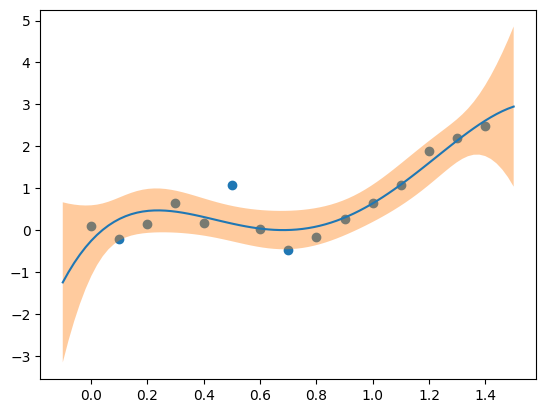

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures # Import PolynomialFeatures class

file_link = 'https://codefinity-content-media.s3.eu-west-1.amazonaws.com/b22d1166-efda-45e8-979e-6c3ecfc566fc/poly.csv'
df = pd.read_csv(file_link)
n = 4   # A degree of the polynomial regression
X = df[['Feature']] # Assign X as a DataFrame
y = df['Target'] # Assign y
X_tilde = PolynomialFeatures(n).fit_transform(X) # Get X_tilde
regression_model = sm.OLS(y, X_tilde).fit() # Initialize and train the model
X_new = np.linspace(-0.1, 1.5, 80) # 1-d array of new feature values
X_new_tilde = PolynomialFeatures(n).fit_transform(X_new.reshape(-1,1)) # Transform X_new for predict() method
y_pred = regression_model.predict(X_new_tilde)
lower = regression_model.get_prediction(X_new_tilde).summary_frame(0.05)['mean_ci_lower'] # Get lower bound for each point
upper = regression_model.get_prediction(X_new_tilde).summary_frame(0.05)['mean_ci_upper'] # get upper bound for each point
plt.scatter(X, y)	# Build a scatterplot
plt.plot(X_new, y_pred)	# Build a Polynomial Regression graph
plt.fill_between(X_new, lower, upper, alpha=0.4)
plt.show()
